### Import packages

`import matplotlib.pyplot as plt`

`from IPython.display import Image`

In [1]:
import matplotlib.pyplot as plt
from IPython.display import Image

### 1. open the notebook with the CO2 data
- last time we picked columns 0, 1 and 3. Choose this time columns 0, 1, 3 and 4.
- Whenever there is a missing value (-99.99) replace it with the corresponding value at column 4.

In [3]:
import numpy as np
import pandas as pd

url = 'ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt' #file link

cols = ['Year','Month','Date', 'average','interpolated','trend','days'] #col names

df=pd.read_csv(url,comment='#', delim_whitespace=True, names = cols) #load file

df.insert(len(df.columns),'Day',15) #insert col at the end

df.head(5) #check

,Year,Month,Date,average,interpolated,trend,days,Day
0,1958,3,1958.208,315.71,315.71,314.62,-1,15
1,1958,4,1958.292,317.45,317.45,315.29,-1,15
2,1958,5,1958.375,317.50,317.50,314.71,-1,15
3,1958,6,1958.458,-99.99,317.10,314.85,-1,15
4,1958,7,1958.542,315.86,315.86,314.98,-1,15


In [7]:
cols = df.columns[[0,1,3,4]]
co2_df = df[cols].copy()
co2_df.head()

,Year,Month,average,interpolated
0,1958,3,315.71,315.71
1,1958,4,317.45,317.45
2,1958,5,317.50,317.50
3,1958,6,-99.99,317.10
4,1958,7,315.86,315.86


In [10]:
# replace data
mask = df['average']== -99.99
co2_df.loc[mask,'average'] = co2_df.loc[mask, 'interpolated']
co2_df.head()

,Year,Month,average,interpolated
0,1958,3,315.71,315.71
1,1958,4,317.45,317.45
2,1958,5,317.50,317.50
3,1958,6,317.10,317.10
4,1958,7,315.86,315.86


### 2. 
 - Create a new directory in your documents folder name it visualizations 
 - in it create a folder named warm-up-mod1
 - list all folders in your documents folder 
`use ls`

### 3. Using matplotlib we want to create the following figure : 
![Alt Image Text](./plots/CO2_warmup.png)

- Each month is signaled by different colour 
- Add an yearly average (red) (use groupby with mean)
- Notice the starting year on the x-axis
- Notice the range on the Y-axis

In [22]:
year_avg = co2_df.groupby('Year')['average'].mean()
year_avg.index

Int64Index([1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
            1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
            1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='Year')

In [26]:
year_avg.values

array([315.241     , 315.97416667, 316.9075    , 317.6375    ,
       318.45083333, 318.99416667, 319.6175    , 320.04416667,
       321.38333333, 322.1575    , 323.045     , 324.62416667,
       325.68      , 326.32      , 327.45333333, 329.67666667,
       330.185     , 331.11416667, 332.03833333, 333.83166667,
       335.40333333, 336.84166667, 338.75166667, 340.105     ,
       341.4475    , 343.05416667, 344.65083333, 346.11666667,
       347.42      , 349.19416667, 351.56583333, 353.12083333,
       354.39416667, 355.6075    , 356.44583333, 357.1       ,
       358.83333333, 360.82      , 362.60583333, 363.72916667,
       366.7       , 368.3775    , 369.55      , 371.14333333,
       373.27916667, 375.8025    , 377.5225    , 379.79583333,
       381.89583333, 383.79166667, 385.60416667, 387.43      ,
       389.89833333, 391.6525    , 393.85333333, 396.52      ,
       398.6475    , 400.83416667, 404.23916667, 406.55333333,
       408.52166667, 412.506     ])

Text(0.5, 1.0, 'CO2 index by month')

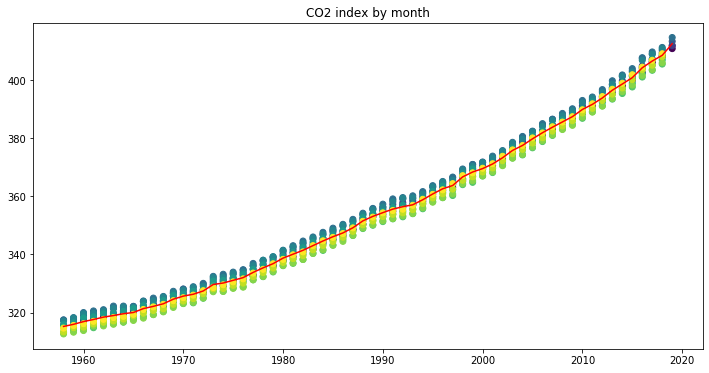

In [29]:
plt.figure(figsize=(12,6))
x1 = co2_df['Year'] 
y1 = co2_df['average']
plt.scatter(x1,y1, c=co2_df['Month'])
#x2 = year_avg.index
#y2 = year_avg.values
plt.plot(year_avg, 'r')
#plt.plot(x2, y2, 'r')
plt.title('CO2 index by month')

### 4. Push your notebook to your github branch 

### 5. save your image into the visualizations folder we have created 

`plt.savefig`

#### [optional] Play with the scales of axis to make the difference among months more apparent